In [84]:
!pip install python-sat   

In [11]:
from google.colab import drive
drive.mount('/content/drive')
!ls ./drive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
 ---   Classroom  'Colab Notebooks'   pythonClass


In [0]:
from pysat.solvers import Glucose3
import time
import numpy as np


def colorToCnf(n, m, matrix, colors):
  #Начало алгоритма
  for k in range(1, colors):
    g = Glucose3()
  
    #для каждой вершины делаю скобу из k переменных
    #отвечает за то что каждая переменная покрашена хотя бы в один цвет
    for iter1 in range(n):
      v = []
      vertex = iter1 * k
      for iter2 in range(k):
        vertex += 1
        v.append(vertex)
      g.add_clause(v)
    
    #скобки из дизъюнкций двух отрицаний
    #для каждой переменной проверяем, что она покрашена ровно в один цвет(переменные для одной вершины разных цветов)
    for iter3 in range(n):
      e1 = iter3 * k
      for iter4 in range(k - 1):
        e1 += 1
        e2 = e1 + 1
        for iter5 in range(iter4 + 1, k):
          g.add_clause([-e1, -e2])
          e2 += 1
    
    #проверка того что соединёные ребром вершины не одного цвета
    for i in range(n):
      for j in range(i, n):
        if matrix[i][j] == 1 and i != j:
          second = j * k
          first = i * k
          for iter6 in range(k):
            first += 1
            second += 1
            g.add_clause([-first, -second])
          
    if g.solve() == True:
      #print("this graph is", k, "colored")
      #print(g.get_model())
      #print(k)
      counter = 1
      vertex = 0
      answer = list()
      
      for i in g.get_model():
        if i > 0:
          vertex += 1
          #print("color of ", vertex, "is-", counter)
          #print(counter, end =" ")
          answer.append(counter)
        if counter == k:
          counter = 0
        counter += 1
      s = ""
      f2.write('%s' % k)
      f2.write("\n")
      for i in answer:
        s += " "
        s += '%s' % i
      f2.write(s)
      f2.close()
      break
      
  


In [0]:
f = open('/content/drive/My Drive/pythonClass/08.in')
f2 = open('/content/drive/My Drive/pythonClass/08.out', 'w')


#считываем данные в матрицу
n, m = [int(x) for x in next(f).split()]
matrix = [[0] * n for i in range(n)]
for line in f:
  a, b = [int(x) for x in line.split()]
  matrix[a-1][b-1] = 1
  matrix[b-1][a-1] = 1
f.close()

colorToCnf(n, m, matrix, 6)

In [0]:
import numpy as np

mass = []
b = 45
#Тестоирование и замер времени на рандомно сгенерированных графах
for i in range(5000):
  n = 10
  a = 0
  print("---------------GRAPH", i, "--------------------")
  matrix1 = np.random.randint(0, 1 + 1, (n, n))
  start_time = time.time()
  for i in range(n):
    for j in range(i, n):
      if matrix1[i][j] == 1 and i != j:
        a += 1
  colorToCnf(n, n, matrix1, n+1)
  print()
  res = time.time() - start_time
  print("--- %s seconds ---" % (time.time() - start_time))
  mass.append([a/b, res])
  
print(mass)




---------------GRAPH 0 --------------------
this graph is 4 colored
4
2 4 3 3 1 3 2 2 1 1 
--- 0.003943204879760742 seconds ---
---------------GRAPH 1 --------------------
this graph is 4 colored
4
4 4 2 3 2 1 1 2 2 1 
--- 0.009267091751098633 seconds ---
---------------GRAPH 2 --------------------
this graph is 4 colored
4
4 3 4 3 2 3 1 2 1 1 
--- 0.0030798912048339844 seconds ---
---------------GRAPH 3 --------------------
this graph is 4 colored
4
3 1 4 4 3 2 3 2 1 1 
--- 0.0018825531005859375 seconds ---
---------------GRAPH 4 --------------------
this graph is 5 colored
5
3 5 3 1 4 3 2 2 2 1 
--- 0.0024209022521972656 seconds ---
---------------GRAPH 5 --------------------
this graph is 4 colored
4
3 4 3 4 2 1 2 3 2 1 
--- 0.0018646717071533203 seconds ---
---------------GRAPH 6 --------------------
this graph is 4 colored
4
4 3 1 3 2 1 1 2 1 1 
--- 0.002012968063354492 seconds ---
---------------GRAPH 7 --------------------
this graph is 5 colored
5
1 1 5 5 4 3 3 2 2 1 
--- 0.002

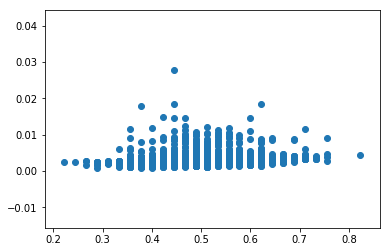

In [0]:
from matplotlib import pyplot as plt


array = np.array(mass)
x, y = array.T
plt.scatter(x,y)

Заметим что при плотности графа от 0.4 до 0.5 (ребер в графе примерно половина от всего возможных) время работы значительно повышается

In [9]:
from pysat import solvers
import time
 
 
def transform(matrix, n, k):
    def get_idx(v, i):
        return v * k + i + 1
   
    clauses = []
 
    # x1i or ... or xni = 1
    for v in range(n):
        cur = []
        for i in range(k):
            cur.append(get_idx(v, i))
       
        clauses.append(cur)
   
    # not x_vi or not x_vj, i != j
    for v in range(n):
        for i in range(k - 1):
            for j in range(i + 1, k):
                clause = [-get_idx(v, i), -get_idx(v, j)]
                clauses.append(clause)
       
    # not x_vi or not x_ui, (v, u) in E
    for v in range(n):
        for u in range(v, n):
            if matrix[v][u]:
                for i in range(k):
                    clause = [-get_idx(v, i), -get_idx(u, i)]
                    clauses.append(clause)
    return clauses
 
 
# main
 
#read input data
f_ans = open('/home/mr_arvo/Programming/tests/ans.txt', 'w')
for in_f_num in range(1, 31):
    f_num_str = ''
    if in_f_num < 10:
        f_num_str = '0' + str(in_f_num)
    else:
        f_num_str = str(in_f_num)
   
   
    f_in = open('/home/mr_arvo/Programming/tests/' + f_num_str + '.in', 'r')
    n, m = [int (x) for x in f_in.readline().split()]
    matrix = [[0] * n for i in range(n)]
    for line in f_in.readlines():
        i, j = [int(x) for x in line.split()]
        matrix[i-1][j-1] = 1
        matrix[j-1][i-1] = 1
    f_in.close()
     
    #solving task
    start_time = time.time()
    for k in range(1, n + 1):
        solver = solvers.Glucose3()
       
        clauses = transform(matrix, n, k)
        for clause in clauses:
            solver.add_clause(clause)
       
        if solver.solve():
            color = 1
            colors_of_vertex = []
            for i in solver.get_model():
                if i > 0:
                    colors_of_vertex.append(color)
                if color == k:
                    color = 0
                color += 1
            f_ans.write(f_num_str + '.in\n')
            f_ans.write('for n = ' + str(n) + ' and m = ' + str(m) +
                  ' time is: %s seconds\n' % (time.time() - start_time))
            f_ans.write(str(k) + '\n')
            f_ans.writelines("%s " % v for v in colors_of_vertex)
            f_ans.write('\n\n')
            break
f_ans.close()

4433334144443334444314144214414242434213243314323314344211323132122132133222112413124321233313112143324422333332123123323412443112133412422141131314232241144441433414321244143124241242324111233242123112213233311413224312222224133312414324113413233413231443322131112222111111211333221222211142213122212122221312211113213112121321112312211312112212211112212211121111111111111121211121112111111112111111
4 4 3 3 3 3 4 1 4 4 4 4 3 3 3 4 4 4 4 3 1 4 1 4 4 2 1 4 4 1 4 2 4 2 4 3 4 2 1 3 2 4 3 3 1 4 3 2 3 3 1 4 3 4 4 2 1 1 3 2 3 1 3 2 1 2 2 1 3 2 1 3 3 2 2 2 1 1 2 4 1 3 1 2 4 3 2 1 2 3 3 3 1 3 1 1 2 1 4 3 3 2 4 4 2 2 3 3 3 3 3 2 1 2 3 1 2 3 3 2 3 4 1 2 4 4 3 1 1 2 1 3 3 4 1 2 4 2 2 1 4 1 1 3 1 3 1 4 2 3 2 2 4 1 1 4 4 4 4 1 4 3 3 4 1 4 3 2 1 2 4 4 1 4 3 1 2 4 2 4 1 2 4 2 3 2 4 1 1 1 2 3 3 2 4 2 1 2 3 1 1 2 2 1 3 2 3 3 3 1 1 4 1 3 2 2 4 3 1 2 2 2 2 2 2 4 1 3 3 3 1 2 4 1 4 3 2 4 1 1 3 4 1 3 2 3 3 4 1 3 2 3 1 4 4 3 3 2 2 1 3 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 1 3 3 3 2 2 1 2 2 2 2 1 1 1 4 2 2 1 3 1 2 2 2 1